In [1]:
# https://www.codecademy.com/learn/learn-python-3 #

In [2]:
def compare_prices(stock1, price1, stock2, price2):
    if price1 > price2:
        return f"{stock1} is greter than {stock2}"
    else:
        return f"{stock2} is greter than {stock1}"

In [3]:
compare_prices("APPL", 100, "AMZ", 10)

'APPL is greter than AMZ'

In [4]:
stocks = ['AAPL', 'GOOG', 'MSFT']
for stock in stocks:
    print(f"{stock} is a tech stock")

AAPL is a tech stock
GOOG is a tech stock
MSFT is a tech stock


##DAY 2##

In [5]:
# Load and inspect the data

# Clean and rename columns

# Filter useful dates and remove unnecessary columns

# Plot a simple price trend

# Save the cleaned dataset 

In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv"
df = pd.read_csv(url)
df.tail()

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
501,2017-02-10,132.460007,132.940002,132.050003,132.119995,20065500,132.119995,114.494004,124.498666,134.503328,Decreasing
502,2017-02-13,133.080002,133.820007,132.750000,133.289993,23035400,133.289993,114.820798,125.205166,135.589534,Increasing
503,2017-02-14,133.470001,135.089996,133.250000,135.020004,32815500,135.020004,115.175718,125.953499,136.731280,Increasing
504,2017-02-15,135.520004,136.270004,134.619995,135.509995,35501600,135.509995,115.545035,126.723499,137.901963,Decreasing
505,2017-02-16,135.669998,135.899994,134.839996,135.350006,22118000,135.350006,116.203299,127.504333,138.805366,Decreasing


In [7]:
# Exploring data

print(df.columns)
print(df.shape)
df.info()
df.describe()




Index(['Date', 'AAPL.Open', 'AAPL.High', 'AAPL.Low', 'AAPL.Close',
       'AAPL.Volume', 'AAPL.Adjusted', 'dn', 'mavg', 'up', 'direction'],
      dtype='object')
(506, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           506 non-null    object 
 1   AAPL.Open      506 non-null    float64
 2   AAPL.High      506 non-null    float64
 3   AAPL.Low       506 non-null    float64
 4   AAPL.Close     506 non-null    float64
 5   AAPL.Volume    506 non-null    int64  
 6   AAPL.Adjusted  506 non-null    float64
 7   dn             506 non-null    float64
 8   mavg           506 non-null    float64
 9   up             506 non-null    float64
 10  direction      506 non-null    object 
dtypes: float64(8), int64(1), object(2)
memory usage: 43.6+ KB


,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up
count,506.000000,506.000000,506.000000,506.000000,5.060000e+02,506.000000,506.000000,506.000000,506.000000
mean,112.935000,113.919447,111.942016,112.958340,4.317842e+07,110.459312,107.311385,112.739865,118.168345
std,11.287490,11.251892,11.263687,11.244744,1.985253e+07,10.537529,11.095804,10.595315,10.670752
min,90.000000,91.669998,89.470001,90.339996,1.147590e+07,89.008370,85.508858,94.047166,97.572721
25%,105.482500,106.349999,104.657501,105.672499,2.974240e+07,103.484803,97.011245,104.954875,111.052267
50%,112.889999,114.145001,111.800003,113.025002,3.747460e+07,110.821123,107.351628,112.799750,118.472542
75%,122.267498,123.497500,121.599998,122.179998,5.076395e+07,119.255457,114.812152,121.889416,128.515793
max,135.669998,136.270004,134.839996,135.509995,1.622063e+08,135.509995,127.289258,129.845000,138.805366


In [8]:
# Cleaning column names and Dropping unnecessry columns



df = df.rename(columns={"AAPL.Close": "Close", "AAPL.Open": "Open", "AAPL.High": "High", "AAPL.Low": "Low"})
df = df.drop(columns = ["AAPL.Volume", "AAPL.Adjusted", "dn", "up","mavg"], errors="ignore")

df

,Date,Open,High,Low,Close,direction
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,Increasing
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,Increasing
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,Decreasing
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,Increasing
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,Increasing
...,...,...,...,...,...,...
501,2017-02-10,132.460007,132.940002,132.050003,132.119995,Decreasing
502,2017-02-13,133.080002,133.820007,132.750000,133.289993,Increasing
503,2017-02-14,133.470001,135.089996,133.250000,135.020004,Increasing
504,2017-02-15,135.520004,136.270004,134.619995,135.509995,Decreasing


In [9]:
# Filter by date

df["Date"] = pd.to_datetime(df["Date"])
df = df[df["Date"] >= "2017-01-01"]

df

,Date,Open,High,Low,Close,direction
474,2017-01-03,115.800003,116.330002,114.760002,116.150002,Increasing
475,2017-01-04,115.849998,116.510002,115.750000,116.019997,Increasing
476,2017-01-05,115.919998,116.860001,115.809998,116.610001,Increasing
477,2017-01-06,116.779999,118.160004,116.470001,117.910004,Increasing
478,2017-01-09,117.949997,119.430000,117.940002,118.989998,Increasing
479,2017-01-10,118.769997,119.379997,118.300003,119.110001,Increasing
480,2017-01-11,118.739998,119.930000,118.599998,119.750000,Increasing
481,2017-01-12,118.900002,119.300003,118.209999,119.250000,Increasing
482,2017-01-13,119.110001,119.620003,118.809998,119.040001,Decreasing
483,2017-01-17,118.339996,120.239998,118.220001,120.000000,Increasing


In [10]:
# Plot the closing price

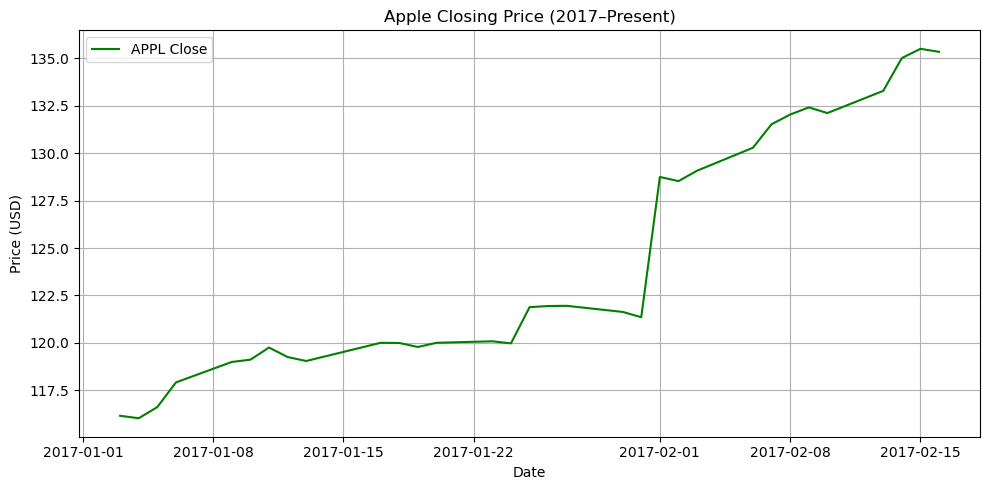

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,5))
plt.plot(df["Date"], df["Close"], label = "APPL Close", color = "green")
plt.title("Apple Closing Price (2017–Present)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
## Save the Cleaned Data

In [13]:
df.to_csv("apple_cleaned.csv", index=False)

##  Feature Engineering and Signal Prototyping

In [16]:
###  1. Calculate 7-Day Moving Average (MA7)

###  df.loc[:, "MA_7"] = df["Close"].rolling(window=7).mean()   This was giving warnings
 ### Because df was created from another DataFrame using filtering or slicing. i.e we filtered the Date thing

## Hence Assigning the rolling average to a new DataFrame for cleaner code

ma_7 = df["Close"].rolling(window=7).mean()
df = df.assign(MA_7=ma_7)

df.tail(3)

,Date,Open,High,Low,Close,direction,MA_7
503,2017-02-14,133.470001,135.089996,133.250000,135.020004,Increasing,132.387139
504,2017-02-15,135.520004,136.270004,134.619995,135.509995,Decreasing,133.132854
505,2017-02-16,135.669998,135.899994,134.839996,135.350006,Decreasing,133.678569


In [18]:
##    2. Calculate 14-Day Price Volatility (Standard Deviation)



df.loc[:,"Volatility_14"] = df["Close"].rolling(window = 14).std()

df.tail()


,Date,Open,High,Low,Close,direction,MA_7,Volatility_14
501,2017-02-10,132.460007,132.940002,132.050003,132.119995,Decreasing,130.858568,4.868332
502,2017-02-13,133.080002,133.820007,132.750000,133.289993,Increasing,131.538568,4.757016
503,2017-02-14,133.470001,135.089996,133.250000,135.020004,Increasing,132.387139,4.831261
504,2017-02-15,135.520004,136.270004,134.619995,135.509995,Decreasing,133.132854,4.760132
505,2017-02-16,135.669998,135.899994,134.839996,135.350006,Decreasing,133.678569,4.454757


In [19]:
##  Drop the row only if all values in the row are missing, i.e NaN.

df = df.dropna(how="all")
df = df.reset_index(drop=True)

df.tail()

,Date,Open,High,Low,Close,direction,MA_7,Volatility_14
27,2017-02-10,132.460007,132.940002,132.050003,132.119995,Decreasing,130.858568,4.868332
28,2017-02-13,133.080002,133.820007,132.750000,133.289993,Increasing,131.538568,4.757016
29,2017-02-14,133.470001,135.089996,133.250000,135.020004,Increasing,132.387139,4.831261
30,2017-02-15,135.520004,136.270004,134.619995,135.509995,Decreasing,133.132854,4.760132
31,2017-02-16,135.669998,135.899994,134.839996,135.350006,Decreasing,133.678569,4.454757


In [20]:
##  3. Calculate Daily Returns % wise


df["Daily_Return"] = df["Close"].pct_change()

df.tail()

,Date,Open,High,Low,Close,direction,MA_7,Volatility_14,Daily_Return
27,2017-02-10,132.460007,132.940002,132.050003,132.119995,Decreasing,130.858568,4.868332,-0.002266
28,2017-02-13,133.080002,133.820007,132.750000,133.289993,Increasing,131.538568,4.757016,0.008856
29,2017-02-14,133.470001,135.089996,133.250000,135.020004,Increasing,132.387139,4.831261,0.012979
30,2017-02-15,135.520004,136.270004,134.619995,135.509995,Decreasing,133.132854,4.760132,0.003629
31,2017-02-16,135.669998,135.899994,134.839996,135.350006,Decreasing,133.678569,4.454757,-0.001181


In [21]:
##    4. Create a Simple Bullish/Bearish Signal

## If current price  > MA7 then Bullish (1), else Bearish(0)

df["Signal"] = (df["Close"] > df["MA_7"]).astype(int)

df.tail()

,Date,Open,High,Low,Close,direction,MA_7,Volatility_14,Daily_Return,Signal
27,2017-02-10,132.460007,132.940002,132.050003,132.119995,Decreasing,130.858568,4.868332,-0.002266,1
28,2017-02-13,133.080002,133.820007,132.750000,133.289993,Increasing,131.538568,4.757016,0.008856,1
29,2017-02-14,133.470001,135.089996,133.250000,135.020004,Increasing,132.387139,4.831261,0.012979,1
30,2017-02-15,135.520004,136.270004,134.619995,135.509995,Decreasing,133.132854,4.760132,0.003629,1
31,2017-02-16,135.669998,135.899994,134.839996,135.350006,Decreasing,133.678569,4.454757,-0.001181,1


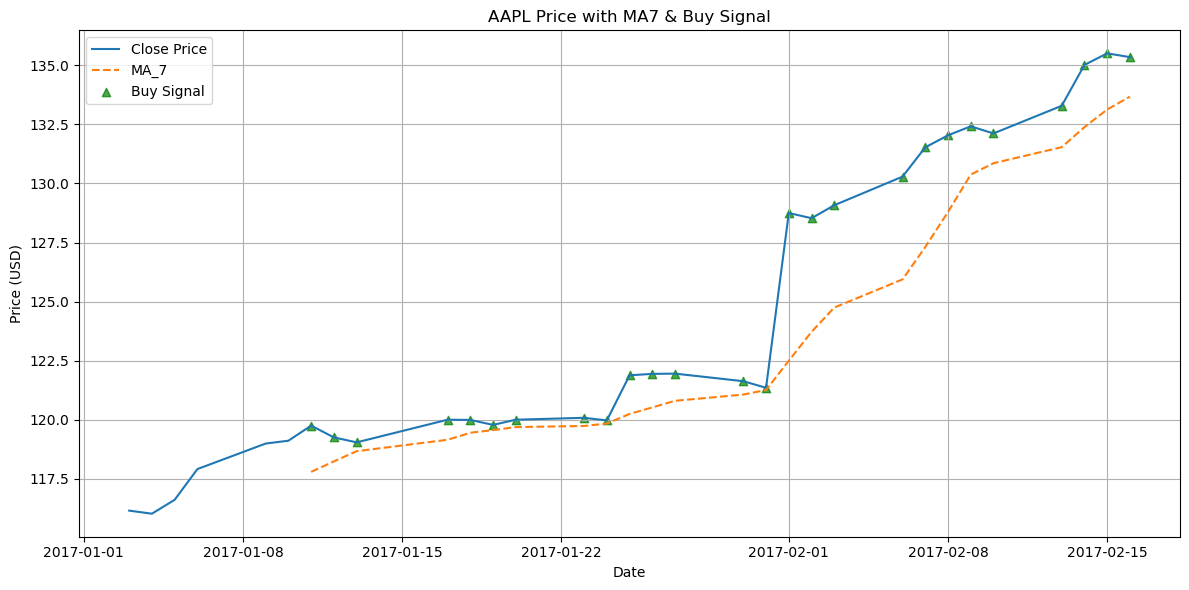

In [22]:
##    5. Plot the Signal Overlay (Optional)


import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"], label = "Close Price")
plt.plot(df["Date"], df["MA_7"], label = "MA_7", linestyle = "--")

plt.xlabel("Date")
plt.ylabel("Price (USD)")

plt.scatter(df[df["Signal"] == 1] ["Date"], 
            df[df["Signal"] == 1] ["Close"],
            label = "Buy Signal",
            color = "green",
            marker = "^",
            alpha = 0.7)

plt.legend()
plt.legend()
plt.title("AAPL Price with MA7 & Buy Signal")
plt.grid(True)
plt.tight_layout()

plt.savefig("Apple_ma7_signal.png")

plt.show()


In [23]:
df.to_csv("Apple_with_signals.csv", index = False)